## Stock/Portfolio Spreadsheet
In this notebook I will show a basic spreadsheet. Who needs Excel when you can code!

In [1]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The key to creating a spreadsheet from scratch is to create a dictionary. 

In [2]:
begin= {
    "Date":'2018-11-01',
    "Ticker":'QQQ',
    "Shares":1000,
    "Buy": 169.70,
    "Sell":171.00,
    "Commission": 0
    
}

The next step is to create a nested dictionary: This will allow everything to work

In [3]:
stock = {
    begin['Date']:begin
}

display(stock)

{'2018-11-01': {'Date': '2018-11-01',
  'Ticker': 'QQQ',
  'Shares': 1000,
  'Buy': 169.7,
  'Sell': 171.0,
  'Commission': 0}}

Set a formula so that I can update dictionary with new trades

In [4]:
def add_date(stock_dict, Date, Ticker, Shares, Buy, Sell, Commission):
    new_date = {
        "Date": Date,
        "Ticker": Ticker,
        "Shares": Shares,
        "Buy": Buy,
        "Sell": Sell,
        "Commission": Commission
        
        
        
    }
    stock_dict[new_date['Date']] = new_date 
    print("{} added!".format(new_date['Date']))     

Now can enter the trades in 1 line of code: The added! gives confimation

In [5]:
#                  Date,     Ticker, Shares, Buy,   Sell, Commission
add_date(stock, '2018-11-02', 'QQQ', 1000, 170.00, 171.00, 0)

2018-11-02 added!


In [6]:
#                  Date,     Ticker, Shares, Buy,   Sell, Commission
add_date(stock, '2018-11-03', 'QQQ', 1000, 170.00, 169.00, 0)

2018-11-03 added!


In [7]:
#                  Date,     Ticker, Shares, Buy,   Sell, Commission
add_date(stock, '2018-11-04', 'QQQ', 1000, 168.12, 166.57, 0)

2018-11-04 added!


In [8]:
#                Date,     Ticker, Shares, Buy,   Sell, Commission
add_date(stock, '2018-11-05', 'QQQ', 1000, 166.50, 168.13, 0)

2018-11-05 added!


In [9]:
#                  Date,     Ticker, Shares, Buy,   Sell, Commission
add_date(stock, '2018-11-06', 'QQQ', 1000, 168.50, 168.90, 0)

2018-11-06 added!


In [10]:
#                  Date,     Ticker, Shares, Buy,   Sell, Commission
add_date(stock, '2018-11-07', 'QQQ', 1000, 167.50, 168.90, 0)

2018-11-07 added!


In [11]:
#                  Date,     Ticker, Shares, Buy,   Sell, Commission
add_date(stock, '2018-11-08', 'QQQ', 1000, 172.00, 175.00, 14)

2018-11-08 added!


This is a basic Example where just 1 trade per day of QQQ occurs. I have set the date as my index. If you want to list multiple trades it's very easy. Just set a # trade as index. Now I will use Pandas features to create a dataframe! 
## None of these trades are real fyi!

In [12]:
def color_negative_red(value):
    color = 'red' if value < 0 else 'green'
    return 'color: %s' % color

In [13]:
df=pd.DataFrame(stock).T
df.drop(['Date'], axis=1, inplace=True)
df=df[['Ticker', 'Shares', 'Buy', 'Sell', 'Commission' ]]
df[['Shares','Buy','Sell','Commission']]=df[['Shares','Buy','Sell','Commission']].astype(float)
df['Gain_Loss']=(df['Shares']*df['Sell'])-(df['Shares']*df['Buy'])-df['Commission']
df['% Change']=df['Gain_Loss']/(df['Shares']*df['Buy'])
df.style.applymap(color_negative_red, subset=['Gain_Loss']).format({"% Change": lambda x: "{:.2%}".format(abs(x))})


,Ticker,Shares,Buy,Sell,Commission,Gain_Loss,% Change
2018-11-01,QQQ,1000,169.7,171,0,1300,0.77%
2018-11-02,QQQ,1000,170,171,0,1000,0.59%
2018-11-03,QQQ,1000,170,169,0,-1000,0.59%
2018-11-04,QQQ,1000,168.12,166.57,0,-1550,0.92%
2018-11-05,QQQ,1000,166.5,168.13,0,1630,0.98%
2018-11-06,QQQ,1000,168.5,168.9,0,400,0.24%
2018-11-07,QQQ,1000,167.5,168.9,0,1400,0.84%
2018-11-08,QQQ,1000,172,175,14,2986,1.74%


Just add a new line of code for each trade and it will automatically be added to dataframe once you re-execute each cell

## Time for some charts!

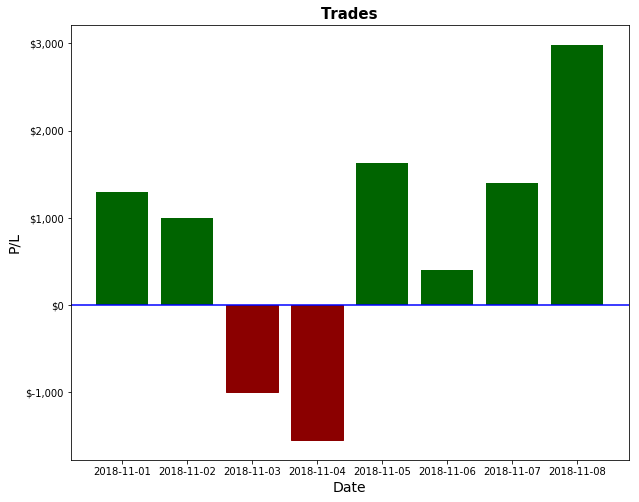

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title("Trades", fontsize = 15, weight = 'bold')
barplot=plt.bar(x=df.index,height=df.Gain_Loss,color='darkgreen')
barplot[2].set_color('darkred')
barplot[3].set_color('darkred')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "$"+"{:,}".format(int(x))))
plt.axhline(0, color='b')
plt.ylabel('P/L', fontsize = 14)
plt.xlabel('Date', fontsize = 14)
sns.set_style("darkgrid")
plt.show()

Finally to make that equity curve, add a new dataframe utalizing the pandas.cumsum function

In [15]:
new_df=df
new_df['YTD']=new_df['Gain_Loss'].cumsum(axis=0)
new_df=new_df[['YTD']]
new_df.style.applymap(color_negative_red, subset=['YTD'])

,YTD
2018-11-01,1300
2018-11-02,2300
2018-11-03,1300
2018-11-04,-250
2018-11-05,1380
2018-11-06,1780
2018-11-07,3180
2018-11-08,6166


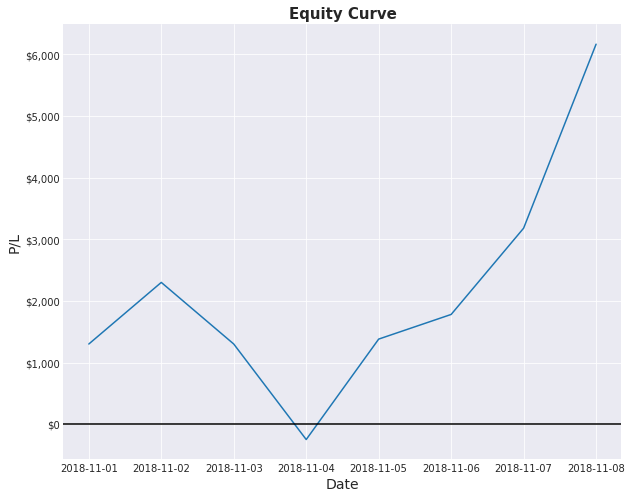

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title("Equity Curve",fontsize = 15, weight = 'bold')
plt.plot(new_df)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "$"+"{:,}".format(int(x))))
plt.axhline(0, color='k')
plt.ylabel('P/L', fontsize = 14)
plt.xlabel('Date', fontsize = 14)
sns.set_style("darkgrid")
plt.show()